In [1]:
import numpy as np
from scipy import stats
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

# Distribución uniforme de números aleatorios en un rango finito

Elijamos una semilla para el generador de números aleatorios de numpy de manera de obtener siempre los mismos gráficos.

In [3]:
np.random.seed(4664)

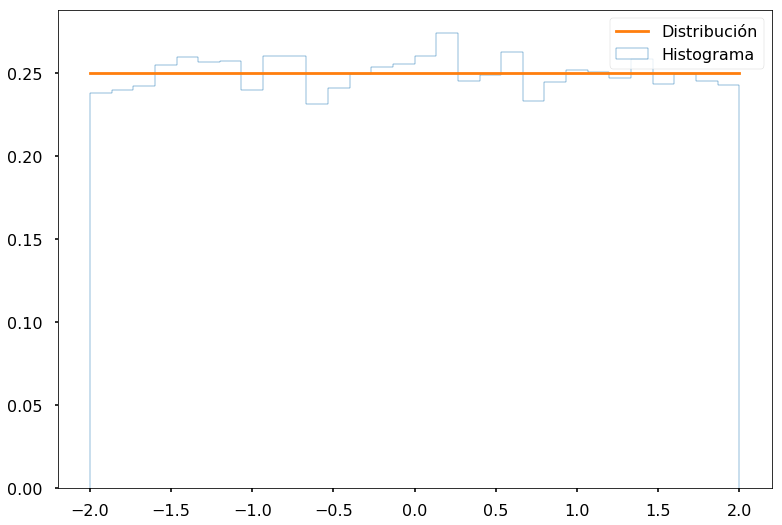

In [4]:
samples = np.random.uniform(-2,2,20000)
x = np.linspace(-2, 2, 1000)
pdf = stats.uniform.pdf(x,loc=-2,scale=4)
plt.hist(samples, bins=30, histtype='step', label="Histograma", density=True)
plt.plot(x, pdf, label="Distribución")
plt.legend()

# Definición de algunos indicadores estadísticos

1. Promedio aritmético 
$$\mu = \int_{-\infty}^{\infty}xf(x)dx$$

2. Varianza  
$$V = \int_{-\infty}^{\infty}(x-\mu)^2f(x)dx$$

3. Desviación estándar
$$ \sigma = \sqrt{V}$$

4. Skewness
$$ \Sigma = \int_{-\infty}^{\infty}\left(\frac{x-\mu}{\sigma}\right)^3f(x)dx$$

5. Kurtosis
$$ K = \int_{-\infty}^{\infty}\left(\frac{x-\mu}{\sigma}\right)^4f(x)dx - 3$$

# Valores de $\Sigma$ y $K$ para algunas distribuciones

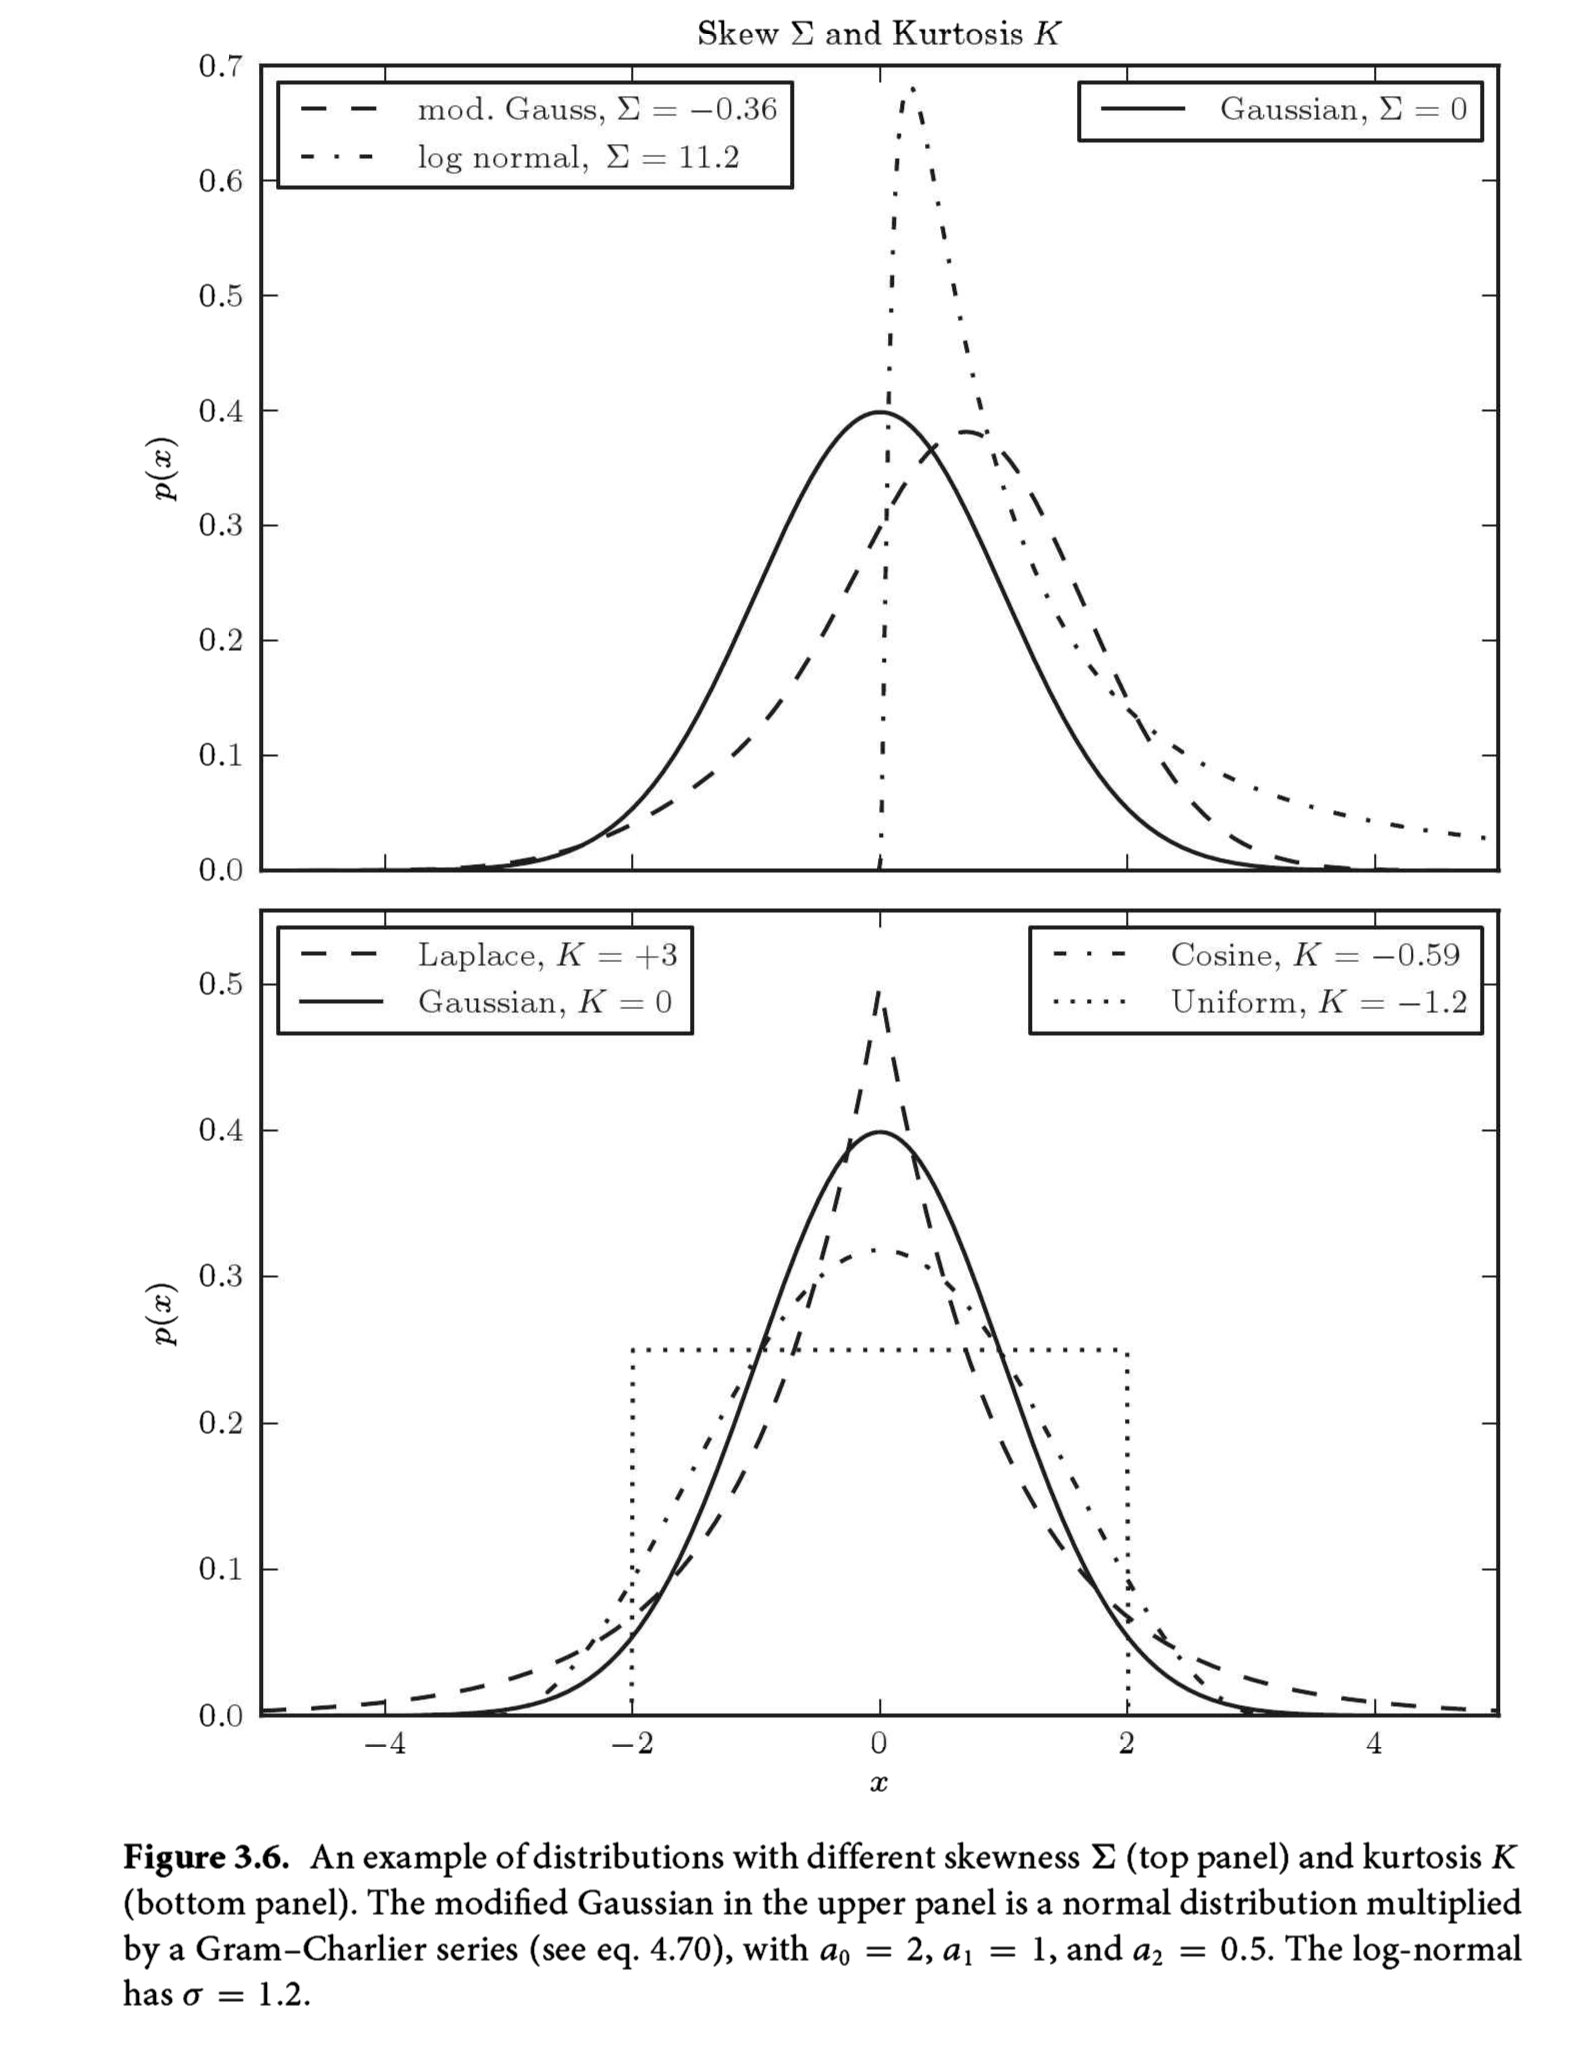

In [5]:
Image("distribuciones.png",width=500)

Valores de algunos indicadores estadísticos para una distribución uniforme de números aleatorios

In [6]:
mean, var, skew, kurt = stats.uniform.stats(loc=-2,scale=4,moments='mvsk')
print ('promedio =',mean)
print ('varianza =',var)
print ('skewness =',skew)
print ('kurtosis =',kurt)

promedio = 0.0
varianza = 1.3333333333333333
skewness = 0.0
kurtosis = -1.2


A medida que el número generado de valores aleatorios aumenta, su distribución se hace cada vez más cercana a la distribución teórica

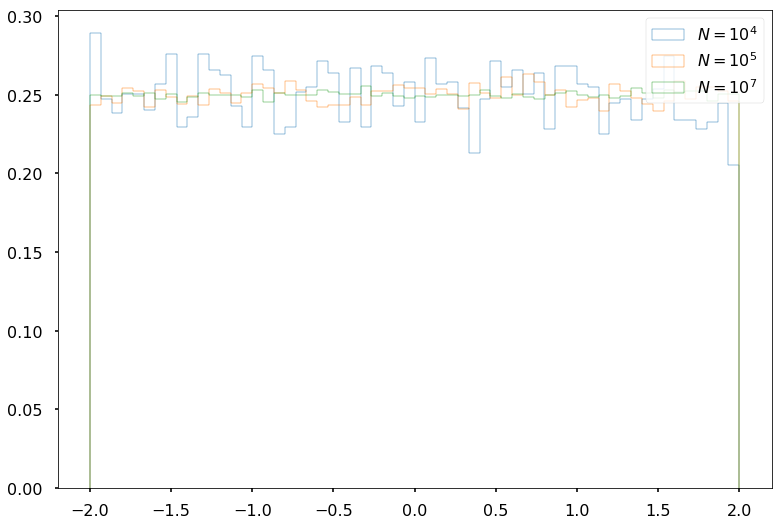

In [7]:
samples = np.random.uniform(-2,2,10000)
samples1 = np.random.uniform(-2,2,100000)
samples2 = np.random.uniform(-2,2,1000000)
plt.hist(samples, bins=60, histtype='step', label="$N=10^4$", density=True)
plt.hist(samples1, bins=60, histtype='step', label="$N=10^5$", density=True)
plt.hist(samples2, bins=60, histtype='step', label="$N=10^7$", density=True)
plt.legend()

# Distribución Gaussiana

Ahora veamos una distribución de números aleatorios con distribución de probabilidad Gaussiana dada por

$$
p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right) 
$$

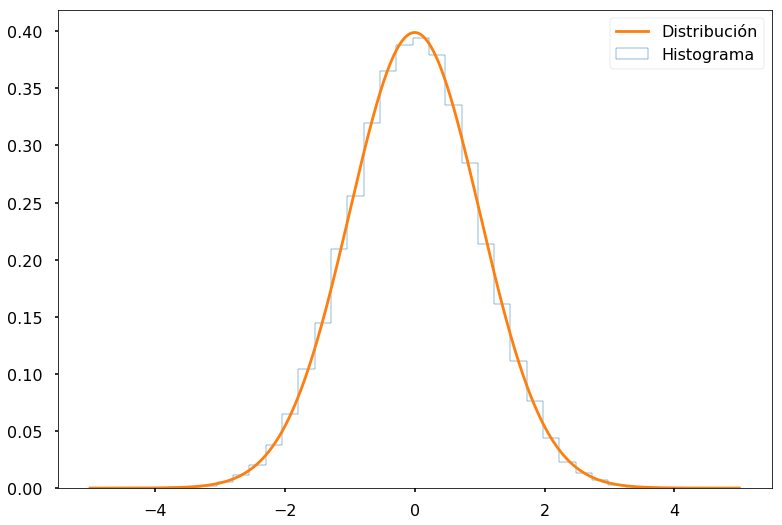

In [8]:
samples = np.random.normal(size=50000)
x = np.linspace(-5, 5, 1000)
pdf = stats.norm.pdf(x)
plt.hist(samples, bins=30, histtype='step', label="Histograma", density=True)
plt.plot(x, pdf, label="Distribución")
plt.legend()

Valores de algunos indicadores estadísticos para esta distribución Gaussiana

In [9]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
print ('promedio =',mean)
print ('varianza =',var)
print ('skewness =',skew)
print ('kurtosis =',kurt)

promedio = 0.0
varianza = 1.0
skewness = 0.0
kurtosis = 0.0


Consideremos una distribución de $N$ datos consistente en la superposición de dos distribuciones Gaussianas con 

$N_1=2500$, $\mu_1=0$, $\sigma_1=2$ 

$N_2=2000$, $\mu_2=5$, $\sigma_2=1$

donde $N=N_1+N_2=4500$.

Text(0, 0.5, 'PDF')

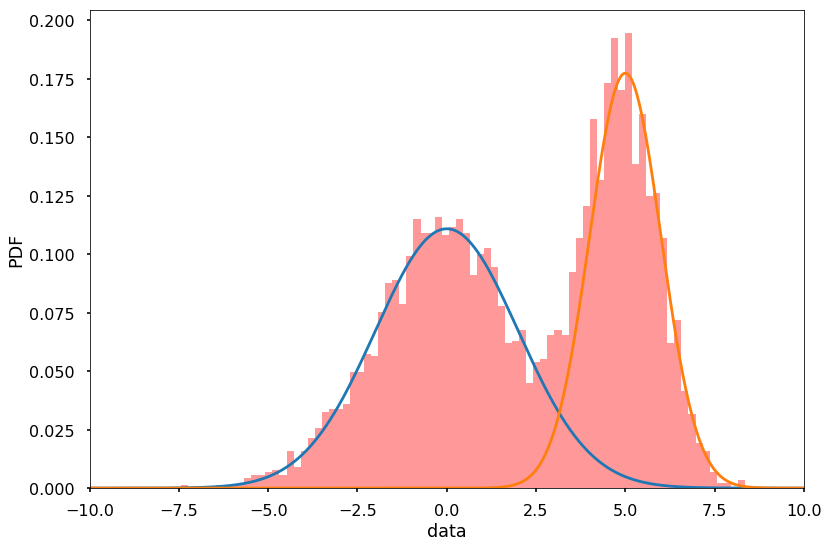

In [10]:
x1 = np.random.normal(0, 2, 2500)
x2 = np.random.normal(5, 1, 2000)
data = np.concatenate([x1,x2])
plt.hist(data, 80, density=True, color='red', alpha=0.4, histtype='stepfilled')
x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
plt.plot(x,(2500/4500)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
sigma = 1
mu = 5
plt.plot(x,(2000/4500)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
plt.xlim(-10, 10)
plt.xlabel('data')
plt.ylabel('PDF')

Ejemplo del efecto de utilizar distintos anchos de los bines en los histogramas. Se aprecian pequeñas diferencias que podrían generar errores en la interpretación de la distribución de datos.

Text(0, 0.5, 'PDF')

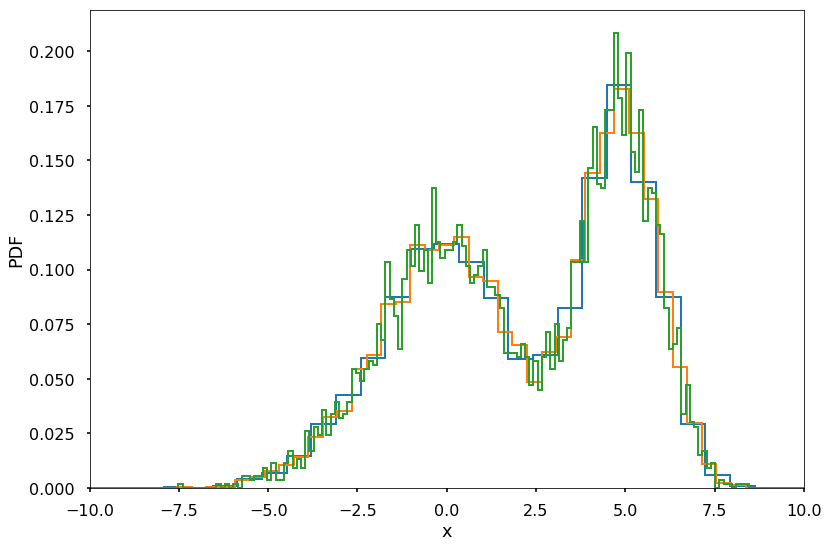

In [11]:
bins = np.linspace(-10,10,30)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,170)
plt.hist(data, bins,  histtype='step', density=True, lw=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('PDF')

Ejemplo del efecto de utilizar distintos valores iniciales para los bines en los histogramas. Al igual que en el caso anterior, se observan pequeñas diferencias que podrían generar errores en la interpretación de la distribución de datos.

Text(0, 0.5, 'PDF')

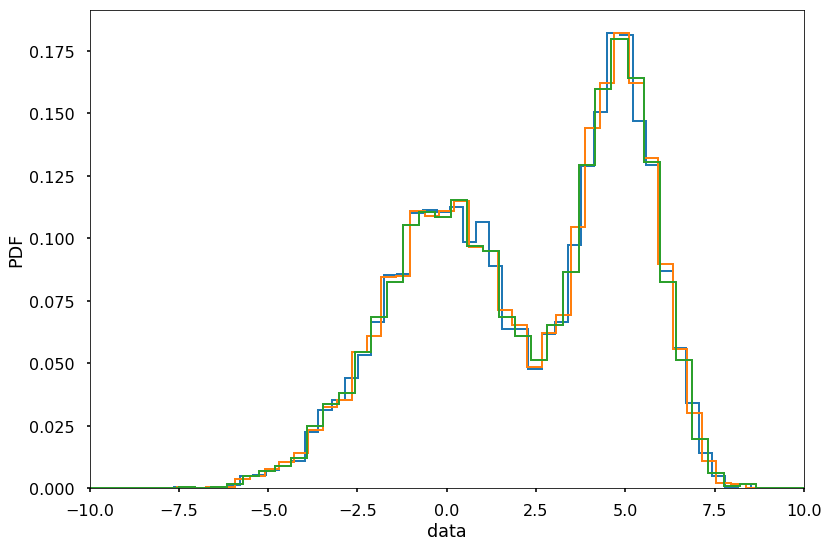

In [12]:
bins = np.linspace(-8,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-10,10,50)
plt.hist(data, bins, histtype='step', density=True, lw=2)
bins = np.linspace(-12,10,50)
plt.hist(data, bins,  histtype='step', density=True, lw=2)
plt.xlim(-10, 10)
plt.xlabel('data')
plt.ylabel('PDF')

# Kernel density estimator (KDE)

Ahora usaremos el Kernel density estimator para estudiar una distribución de datos ${x_i}$. Algunas referencias para este tema

1. Nonparametric Kernel Density Estimation and Its Computational Aspects, Artur Gramacki, Springer, 2018

2. Density Estimation for Statistics and Data Analysis, B. W. Silverman, Chapman & Hall, 1998

En este método la densidad de probabilidad está dada por

$$
\hat{f}(x) = \frac{1}{nh^d}\sum_{i=1}^{N}K\left(\frac{x-x_i}{h}\right)
$$

donde $h$ es la "ventana" (bandwith), $d$ es la dimensión de las variables y $K$ es una función llamada kernel, la cual debe cumplir las siguientes propiedades

$\int K(x)dx=1$.

$\int xK(x)dx=0$.

$\int x^2K(x)dx <\infty$.

$K(x)=K(-x)$.

$K(x)\ge 0$ para todo $x$.

La siguiente figura muestra algunos ejemplos de kernels.

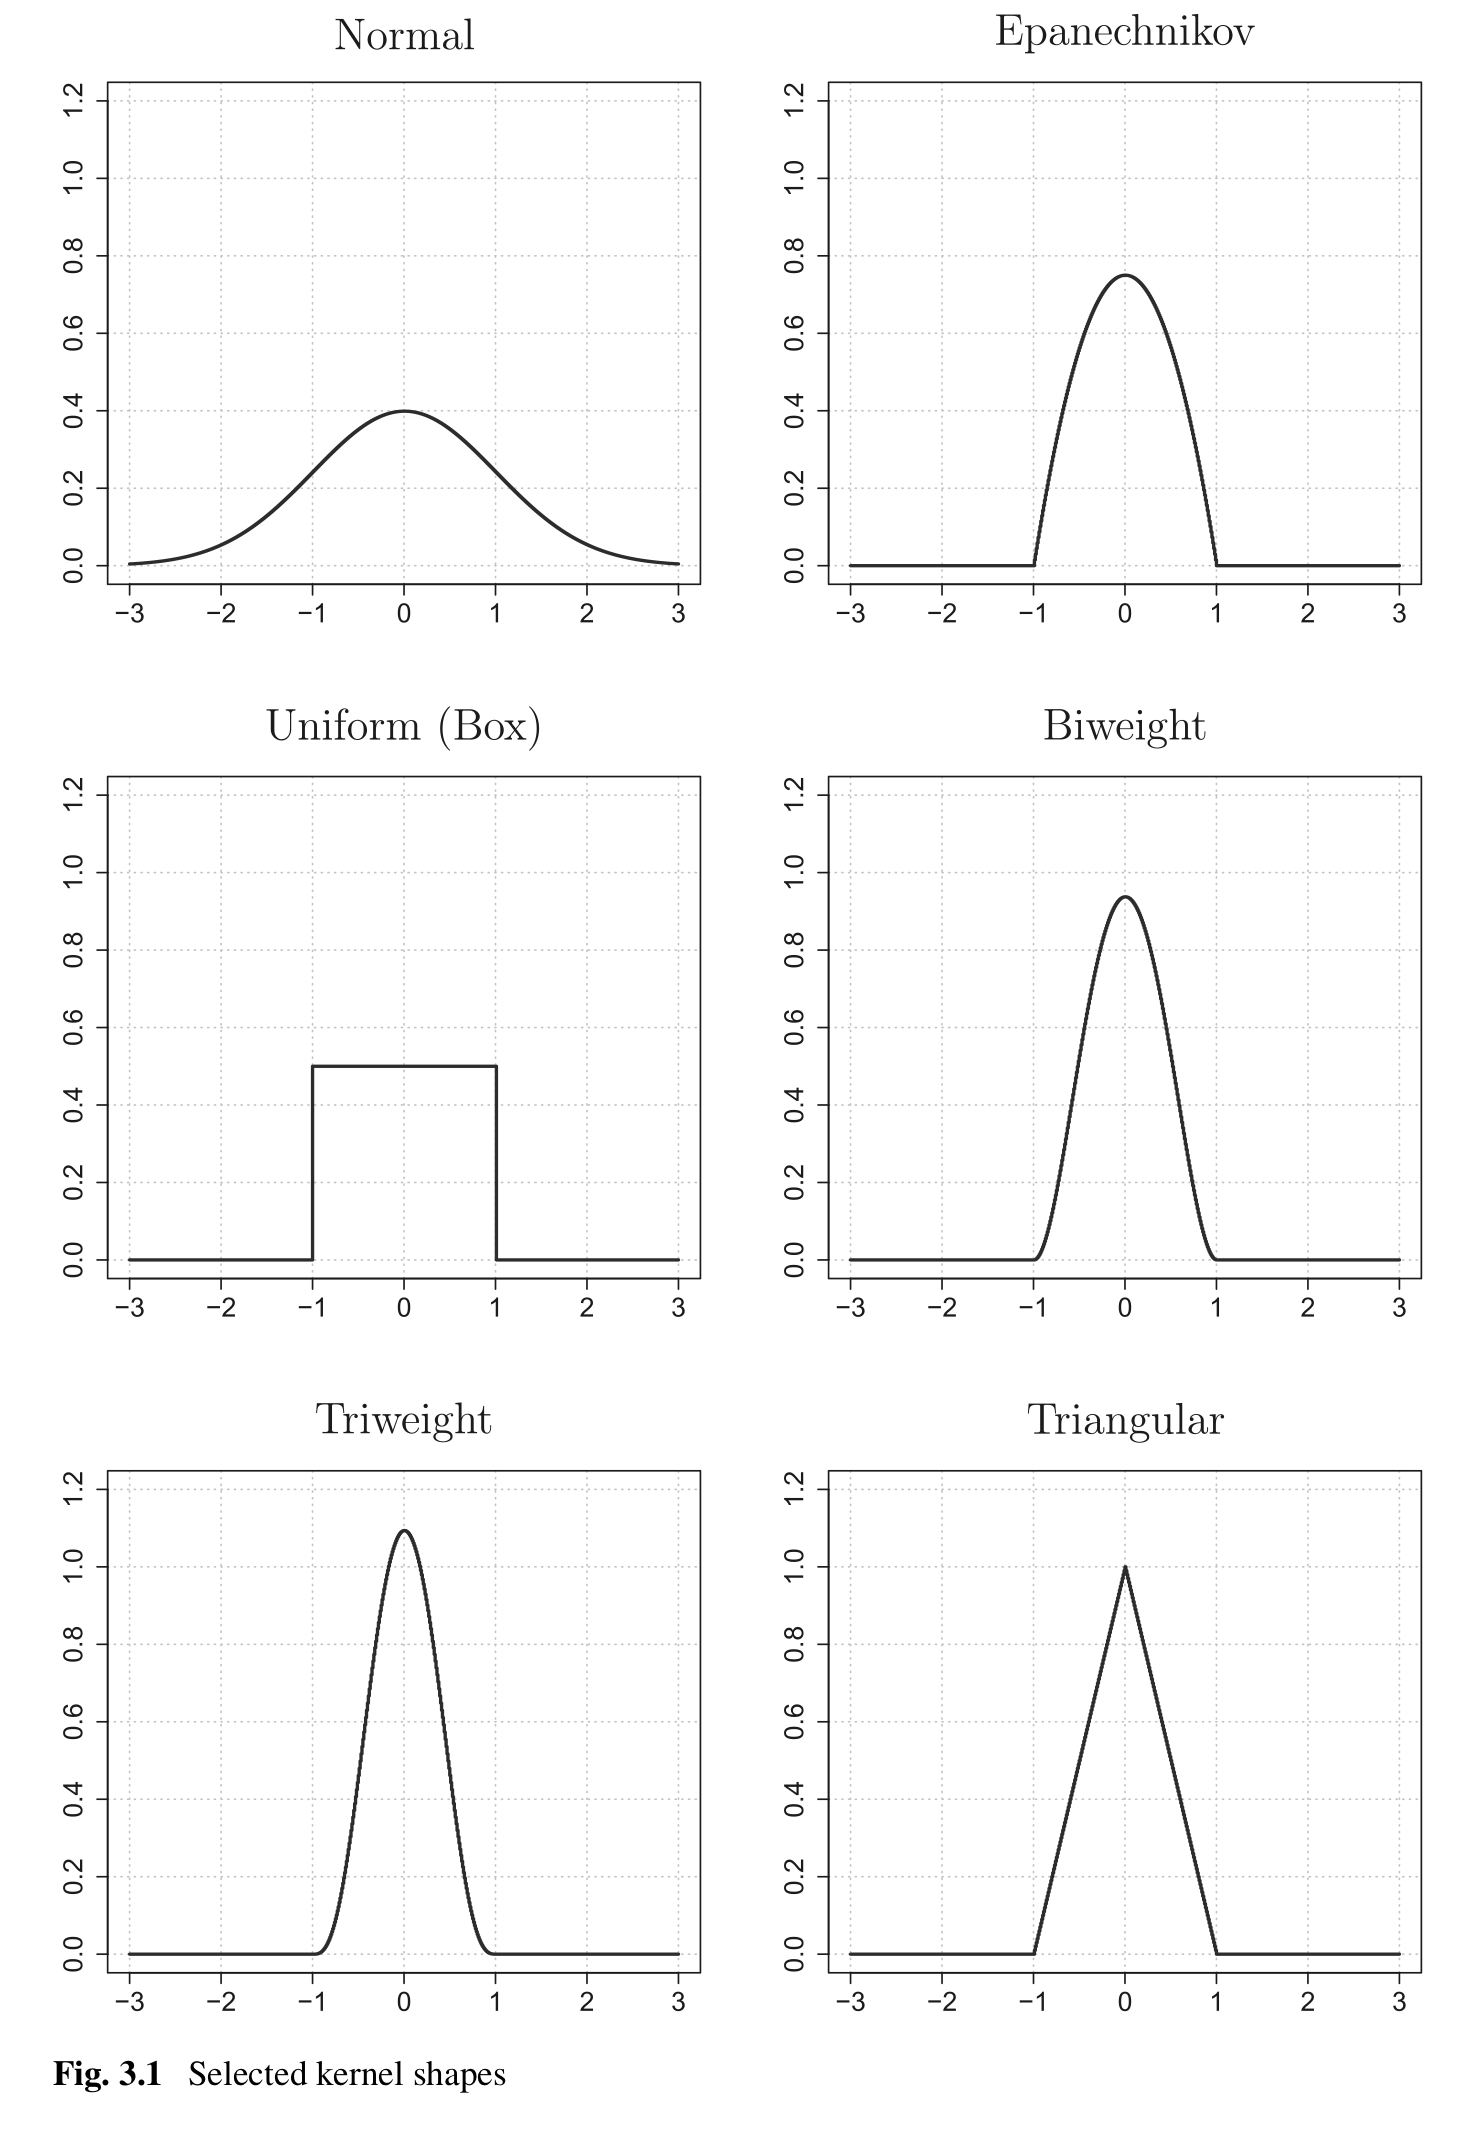

In [13]:
Image("kernels.png",width=500)

In [14]:
from sklearn.neighbors import KernelDensity

Text(0, 0.5, 'PDF')

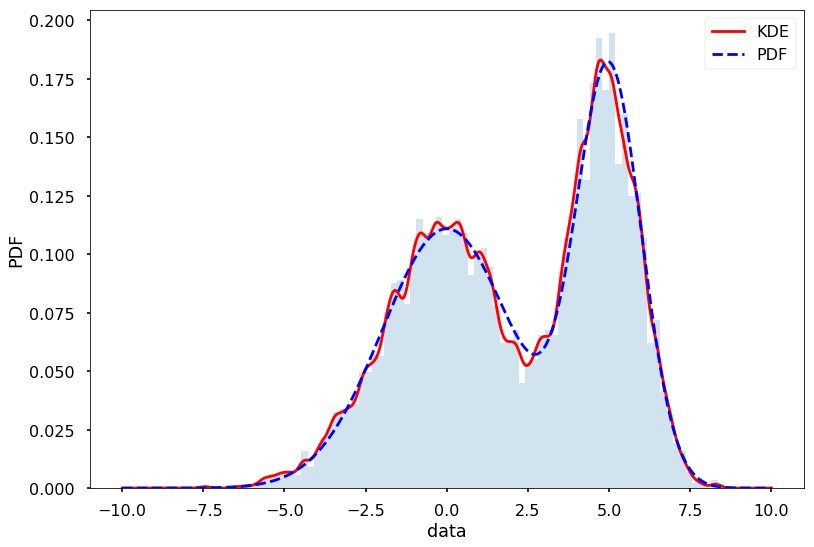

In [15]:
kde = KernelDensity(0.15).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.hist(data, 80, density=True, alpha=0.2)
plt.plot(x, density_kde, '-r', label='KDE')

x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
pdf1 = (2500/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
sigma = 1
mu = 5
pdf2 = (2000/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf1+pdf2,ls='dashed', label='PDF',color='blue')

plt.legend()
plt.xlabel('data')
plt.ylabel('PDF')

El ancho de la ventana afecta el grado de "suavidad" de la curva. A menor valor, mayores son las oscilaciones en la estimación de la densidad de probabilidad. 

Text(0, 0.5, 'PDF')

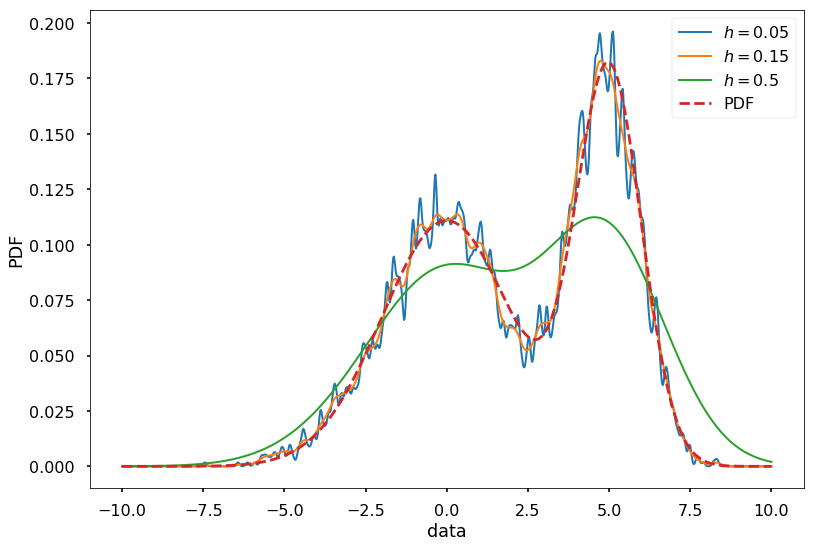

In [16]:
kde = KernelDensity(0.05).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=0.05$', lw=2)
kde = KernelDensity(0.15).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=0.15$', lw=2)
kde = KernelDensity(1.5).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=0.5$', lw=2)

x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
pdf1 = (2500/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
sigma = 1
mu = 5
pdf2 = (2000/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf1+pdf2,ls='dashed', label='PDF')

plt.legend()
plt.xlabel('data')
plt.ylabel('PDF')

# Comparación de diferentes kernels

Text(0, 0.5, 'PDF')

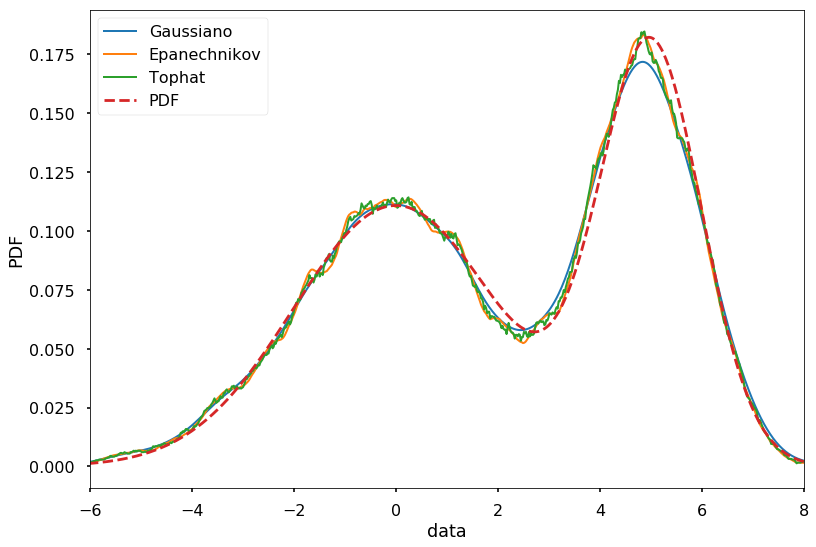

In [17]:
kde = KernelDensity(0.35,kernel='gaussian').fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='Gaussiano', lw=2)
kde = KernelDensity(0.35,kernel='epanechnikov').fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='Epanechnikov', lw=2)
kde = KernelDensity(0.35,kernel='tophat').fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='Tophat', lw=2)

x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
pdf1 = (2500/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
sigma = 1
mu = 5
pdf2 = (2000/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf1+pdf2,ls='dashed', label='PDF')
plt.xlim(-6,8)
plt.legend()
plt.xlabel('data')
plt.ylabel('PDF')

# ¿Cómo elegir el valor de $h$ correcto?

La elección de $h$ es importante porque distintos valores pueden dar, en algunos casos, resultados muy distintos para algunas distribuciones de datos. Idealmente deberíamos elegir $h$ lo suficientemente pequeño para recuperar la estructura fina de la distribución de datos. Sin embargo, si $h$ es muy pequeño, la varianza será más grande. Por otro lado, si $h$ es muy grande, aumentaremos el sesgo (bias) de la densidad estimada.

Uno de los métodos que se pueden usar para elegir $h$ consiste en calcular al error cuadrático medio integrado (MISE)

$$
\mathrm{MISE}(\hat{f})=E\int (\hat{f}-f)^2dx = \int (\mu-f)^2dx + \int (E\hat{f}^2-\mu^2) dx = \int\mathrm{Bias}^2f dx + \int\mathrm{Var}f dx,
$$

donde $\mu=E\hat{f}$ es el valor medio de la densidad estimada.

Se puede demostrar que el valor óptimo de $h$ que minimiza el MISE está dado por

$$
h_{\mathrm{opt}} = k_2^{-2/5}\left[\int K(t)^2dt\right]^{1/5} \left[\int f''(x)^2 dx\right]^{-1/5} N^{-1/5},
$$

donde $k_2=\int t^2K(t)dt$.

Este valor óptimo depende de la distribución que queremos determinar. Por este motivo, una técnica habitual es usar $f(x)$ igual a una Gaussiana o algún otro kernel. En este caso, se obtiene $h_{\mathrm{opt}}=1.06\sigma N^{-1/5}$, donde $\sigma$ es estimado a partir de los datos.

In [18]:
h_opt = 1.06*np.std(data)*pow(len(data),-1/5)
print (h_opt)

0.5890533132176539


Text(0, 0.5, 'PDF')

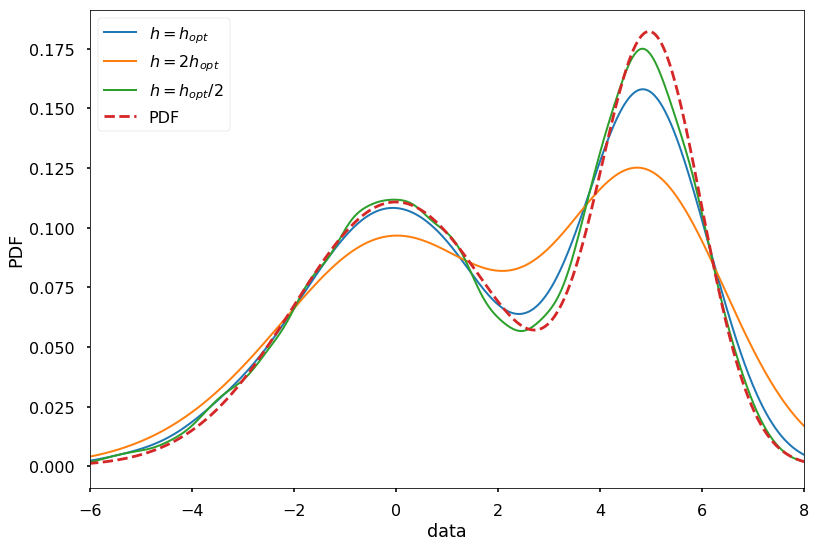

In [19]:
kde = KernelDensity(h_opt).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=h_{opt}$', lw=2)
kde = KernelDensity(2*h_opt).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=2h_{opt}$', lw=2)
kde = KernelDensity(h_opt/2).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=h_{opt}/2$', lw=2)

x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
pdf1 = (2500/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
sigma = 1
mu = 5
pdf2 = (2000/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf1+pdf2,ls='dashed', label='PDF')
plt.xlim(-6,8)
plt.legend()
plt.xlabel('data')
plt.ylabel('PDF')

In [21]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 10)},
                    cv=10)
grid.fit(data[:, None])
print (grid.best_params_)

KeyboardInterrupt: 

Text(0, 0.5, 'PDF')

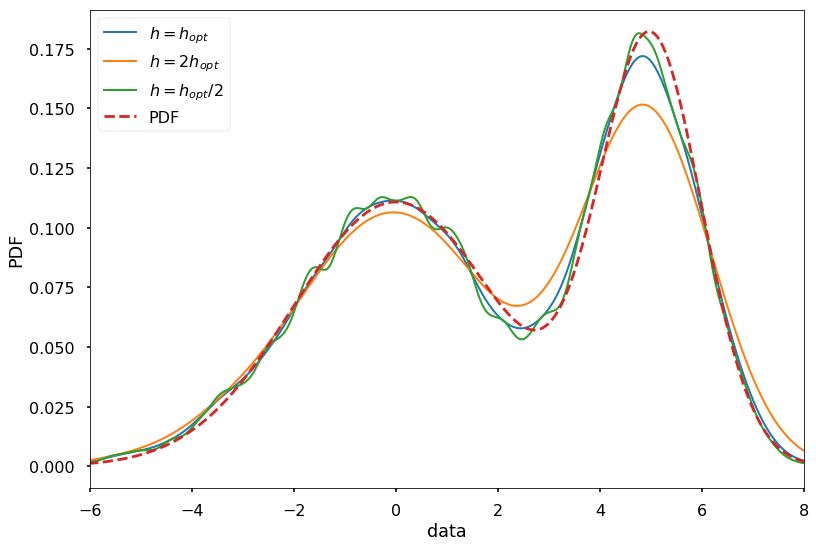

In [22]:
h_opt = 0.34827586206896555
kde = KernelDensity(h_opt).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=h_{opt}$', lw=2)
kde = KernelDensity(2*h_opt).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=2h_{opt}$', lw=2)
kde = KernelDensity(h_opt/2).fit(data[:, None])
density_kde = np.exp(kde.score_samples(x[:, None]))
plt.plot(x, density_kde, label='$h=h_{opt}/2$', lw=2)

x = np.linspace(-10,10,1000)
sigma = 2
mu = 0
pdf1 = (2500/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
sigma = 1
mu = 5
pdf2 = (2000/4500)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf1+pdf2,ls='dashed', label='PDF')
plt.xlim(-6,8)
plt.legend()
plt.xlabel('data')
plt.ylabel('PDF')

# Gaussiann Mixture Models (GMM)

Consideremos ahora un estimador de densidad consistente en una combinación lineal de $N$ Gaussianas

$$
\hat{f}(x) = N \sum_{i=1}^{N} \alpha_j \mathrm{Normal}(x;\mu_j,\Sigma_j)
$$

donde $\Sigma_j$ es la covarianza.

Text(0, 0.5, 'N')

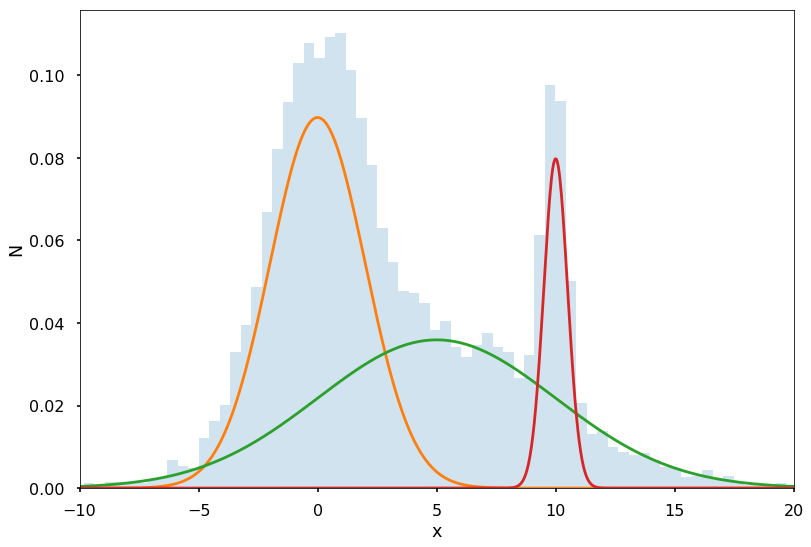

In [23]:
np.random.seed(2)

data1 = np.concatenate([np.random.normal(0, 2, 4500),
                    np.random.normal(5, 5, 4500),
                    np.random.normal(10, 0.5, 1000)])
plt.hist(data1, 80, density=True, alpha=0.2)

x = np.linspace(-10,20,1000)
sigma = 2
mu = 0
plt.plot(x,(4500/10000)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
sigma = 5
mu = 5
plt.plot(x,(4500/10000)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))
sigma = 0.5
mu = 10
plt.plot(x,(1000/10000)/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))

plt.xlim(-10, 20)
plt.xlabel('x')
plt.ylabel('N')

Text(0, 0.5, 'N')

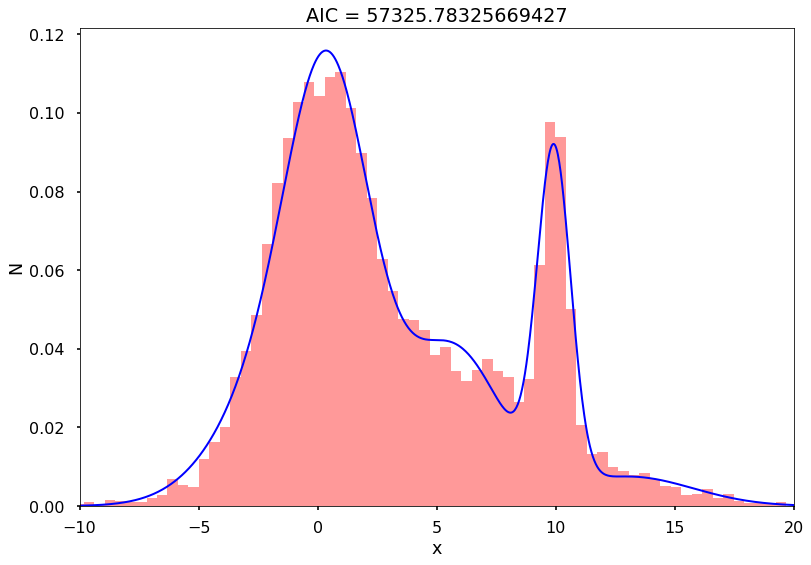

In [24]:
from sklearn.mixture import GaussianMixture

data2 = data1.reshape(-1,1)
clf = GaussianMixture(5,max_iter=1000).fit(data2)

xpdf = np.linspace(-10, 20, 1000)
xpdfaux = xpdf
xpdf = xpdf.reshape(-1,1)
density = np.exp(clf.score_samples(xpdf))
plt.hist(data2, 80, density=True, color='red', alpha=0.4, histtype='stepfilled')
plt.plot(xpdfaux, density, '-r', lw=2, color='blue')
plt.xlim(-10, 20)
plt.title('AIC = %s'%(clf.aic(data2)))
plt.xlabel('x')
plt.ylabel('N')

# ¿Cuántas Gaussianas?

Para determinar cuántas Gaussianas son necesarias para ajustar los datos se pueden emplear el criterio de información de Aikaki (AIK) o el criterio de información Bayesiano (BIC).

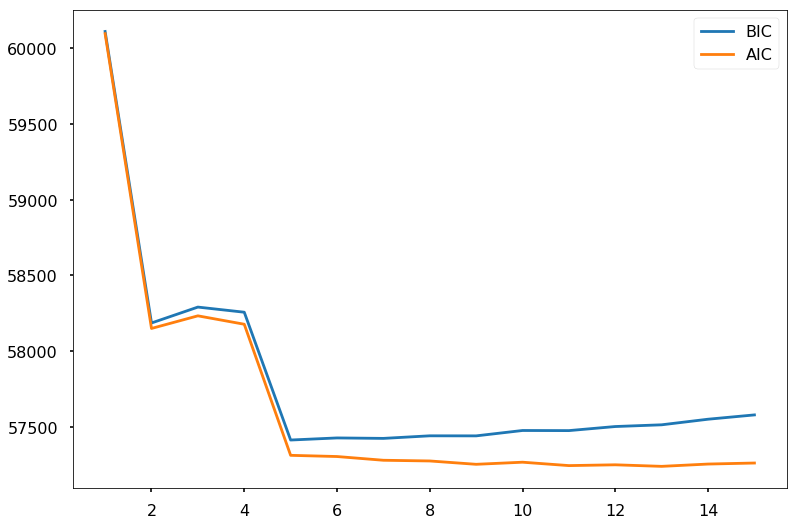

In [25]:
n_estimators = np.arange(1, 16)
clfs = [GaussianMixture(n,max_iter=1000).fit(data2) for n in n_estimators]
bics = [clf.bic(data2) for clf in clfs]
aics = [clf.aic(data2) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend()

Text(0, 0.5, 'distribucion')

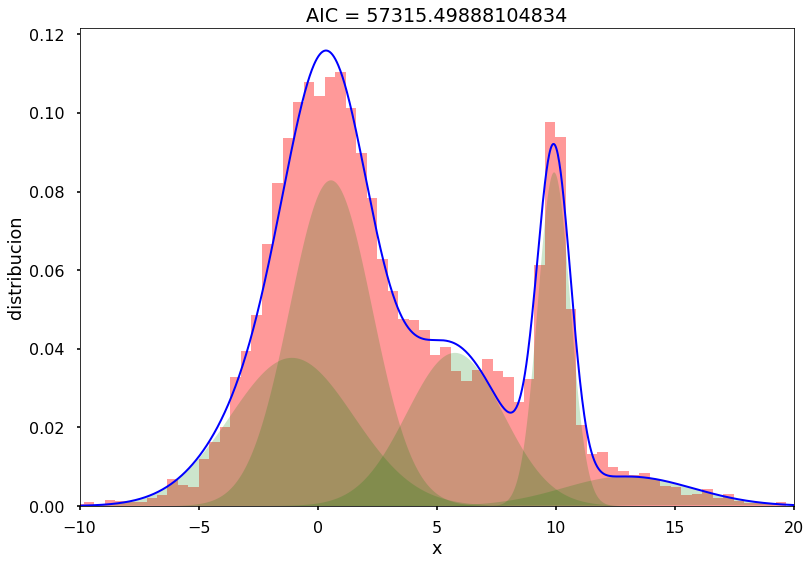

In [26]:
data2 = data1.reshape(-1,1)
clf = GaussianMixture(5,max_iter=1000).fit(data2)

plt.hist(data2, 80, density=True, color='red', alpha=0.4, histtype='stepfilled')
plt.plot(xpdf, density, color='blue',lw=2)

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='green',
             edgecolor='none', alpha=0.2)


plt.title('AIC = %s'%(clf.aic(data2)))
plt.xlim(-10, 20)
plt.xlabel('x')
plt.ylabel('distribucion')

In [27]:
clf.means_

array([[ 9.93380232],
       [ 0.56102359],
       [ 5.76742354],
       [-1.07761178],
       [13.01820871]])

In [28]:
clf.covariances_

array([[[0.46607677]],

       [[3.01341461]],

       [[4.08838807]],

       [[6.73875307]],

       [[7.28839478]]])

In [29]:
clf.weights_

array([0.145254  , 0.36049477, 0.19752428, 0.24530404, 0.0514229 ])

# Kmeans

Es un método simple que permite particionar los datos en un número pequeño de clusters disjuntos de manera tal que se miminiza la cantidad

$$
\sum_{i=1}^{K}\sum_{i\in C_k} ||x_i-\mu_k||^2
$$

donde $\mu_k=\frac{1}{N_k}\sum_{i\in C_k} x_i$ es la posición del centroide de los puntos en el conjunto $C_k$.

In [30]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [31]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]

Text(0, 0.5, 'y')

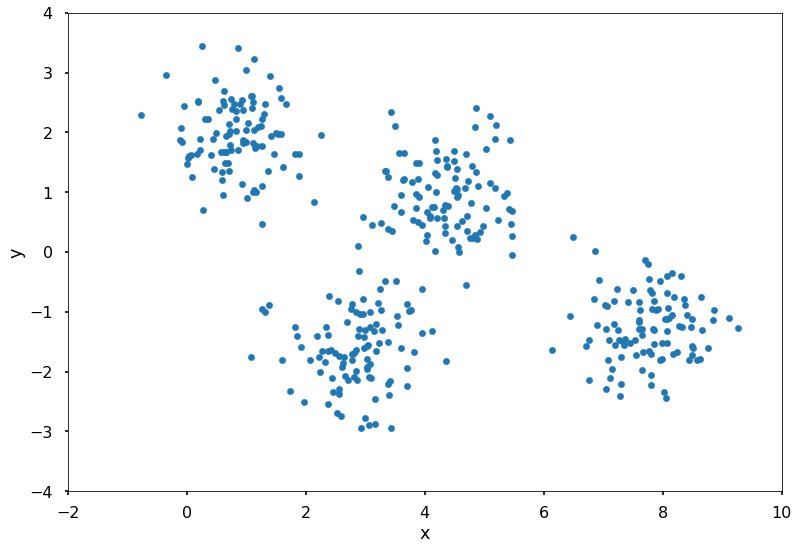

In [32]:
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.ylim(-4,4)
plt.xlim(-2,10)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

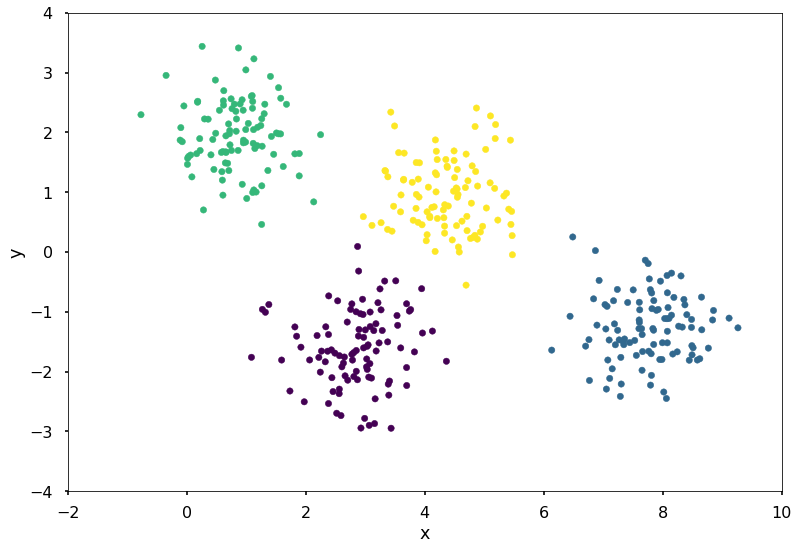

In [33]:
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.ylim(-4,4)
plt.xlim(-2,10)
plt.xlabel('x')
plt.ylabel('y')

In [34]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

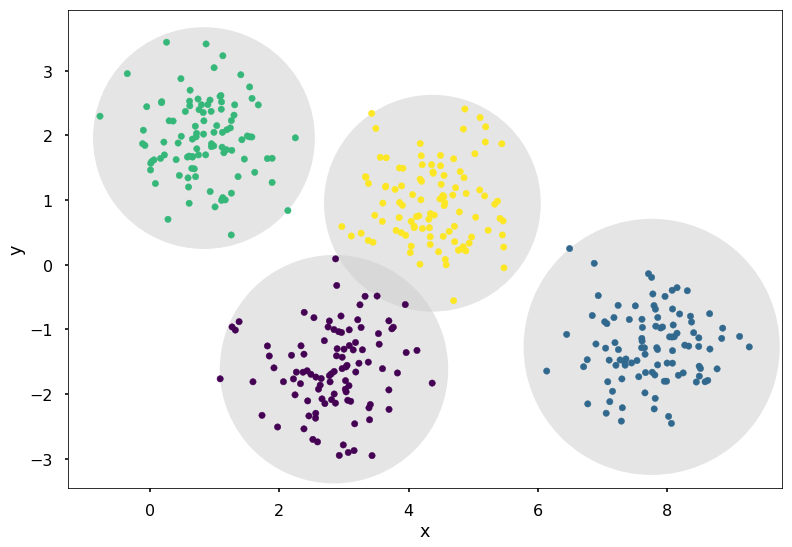

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

Los clusters en k-means son esféricos. Por lo tanto, no existe manera de que puedan obtenerse clusters elongados o elípticos.

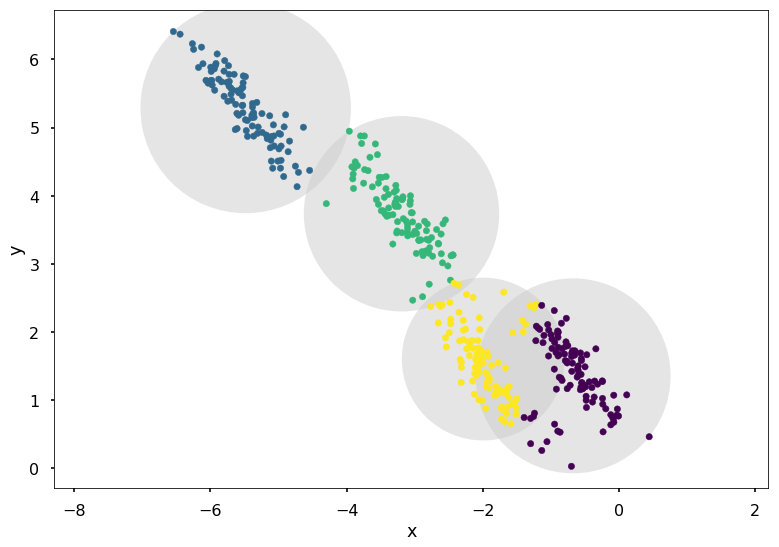

In [36]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

# Gaussian Mixture en 2D

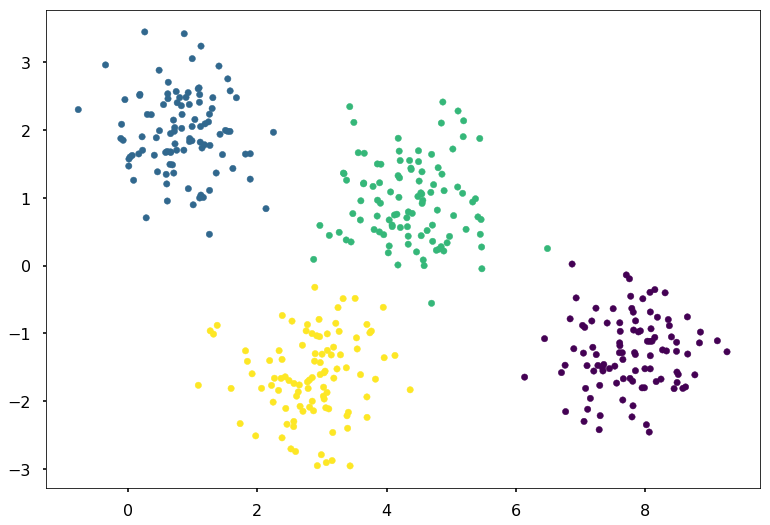

In [37]:
gmm = GaussianMixture(4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [125]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


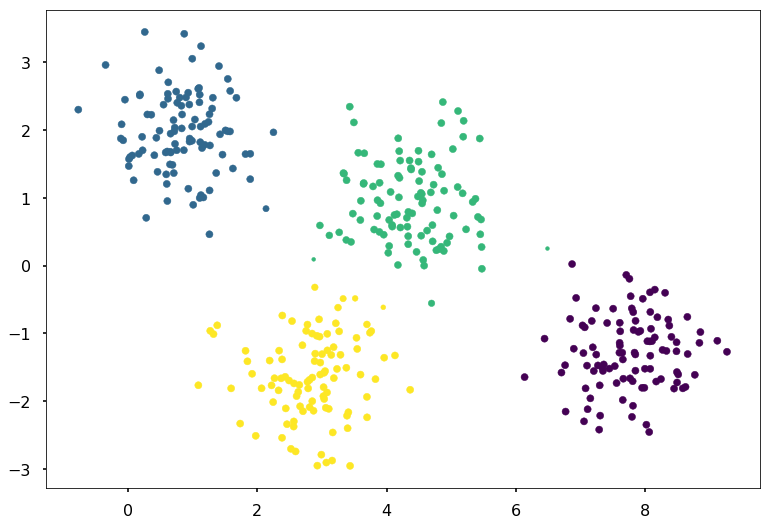

In [39]:
size = 50*probs.max(1)**2
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [40]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

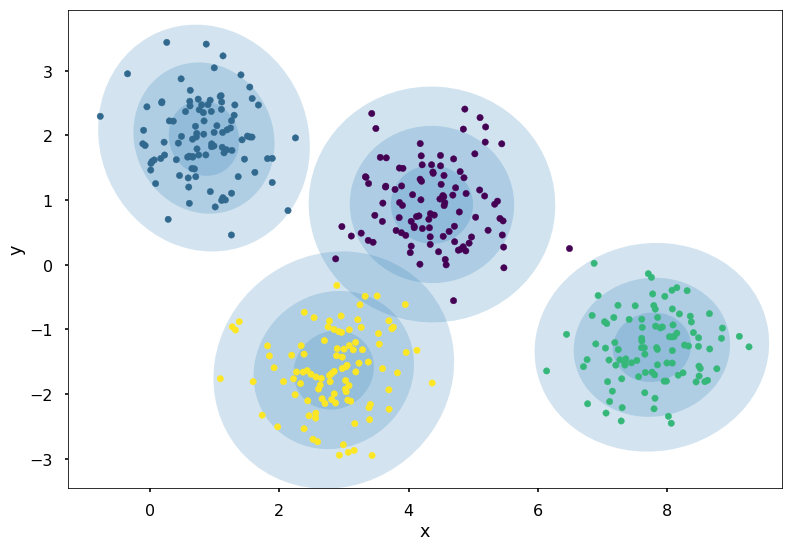

In [41]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

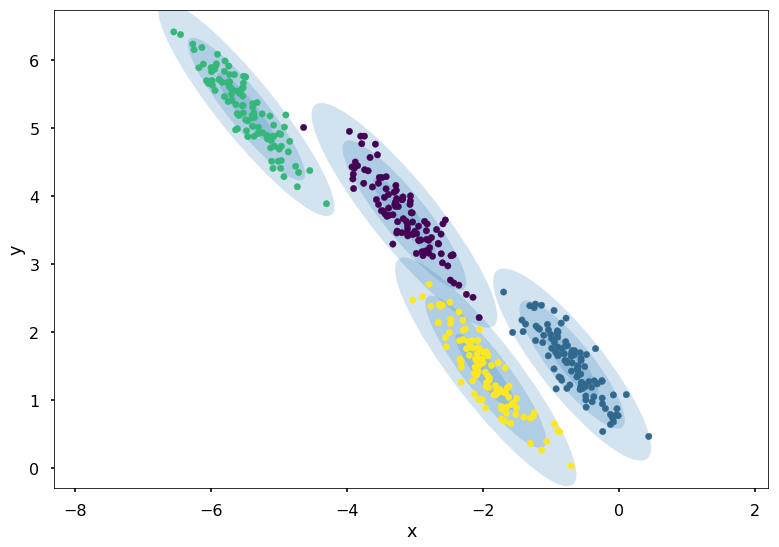

In [42]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

# Ajuste de datos usando Método Maximum Likelihood

In [43]:
from astropy.io import fits as fits

In [44]:
data_hdus = fits.open('datos.fits')
data = data_hdus[1].data
data_hdus.close()

In [45]:
print (data.dtype.names)

('APOGEE_ID', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'RA_APO', 'DEC_APO', 'GLON', 'GLAT', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'M_H', 'M_H_ERR', 'ALPHA_M', 'ALPHA_M_ERR', 'FE_H', 'FE_H_ERR', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error')


In [46]:
print ('Number of stars =', (len(data)))

Number of stars = 21700


Text(0, 0.5, '[$\\alpha$/Fe]')

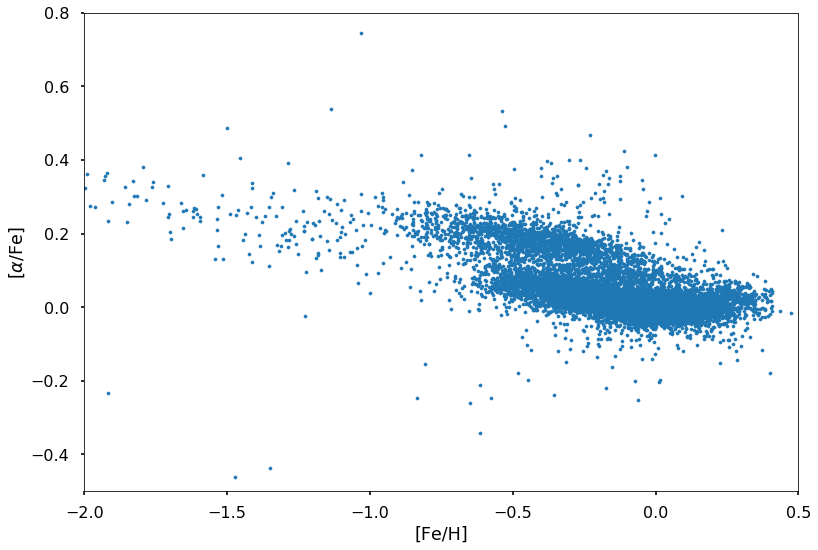

In [47]:
fe_h = data['FE_H']
alpha = data['ALPHA_M']
plt.scatter(fe_h,alpha,s=10)
plt.xlim(-2.0,0.5)
plt.ylim(-0.5,0.8)
plt.xlabel('[Fe/H]')
plt.ylabel(r'[$\alpha$/Fe]')

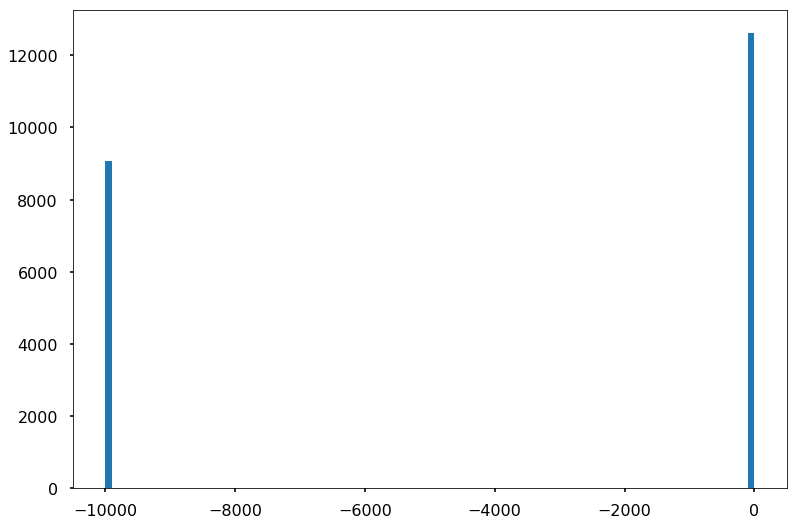

In [48]:
plt.hist(fe_h, bins=100);

In [49]:
print(np.min(fe_h))

-9999.0


In [50]:
gd = (np.not_equal(data['fe_h'],-9999.0)) &\
     (np.not_equal(data['alpha_m'],-9999.0))

In [51]:
ind = np.where(gd)[0]
stars = data[:][ind]
print ('Number of stars =',len(stars))

Number of stars = 12631


Text(0, 0.5, '[$\\alpha$/Fe]')

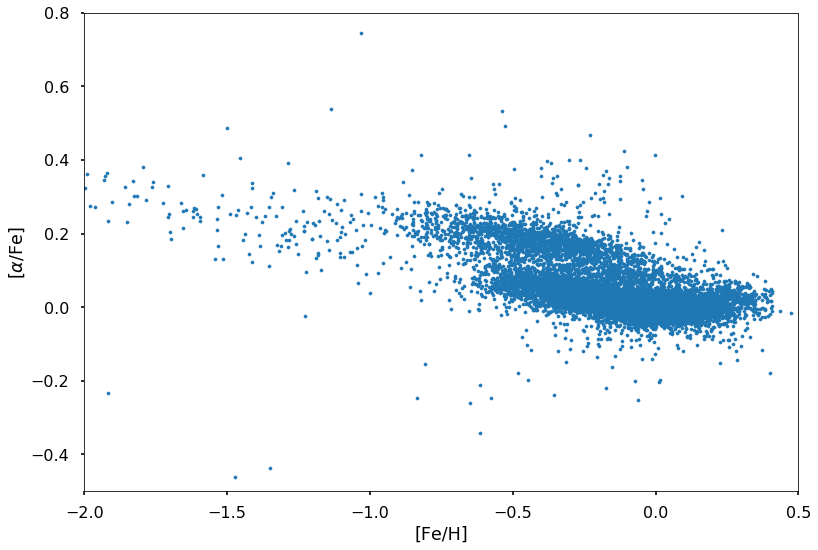

In [52]:
fe_h = stars['FE_H']
alpha = stars['ALPHA_M']
plt.scatter(fe_h,alpha,s=10)
plt.xlim(-2.0,0.5)
plt.ylim(-0.5,0.8)
plt.xlabel('[Fe/H]')
plt.ylabel(r'[$\alpha$/Fe]')

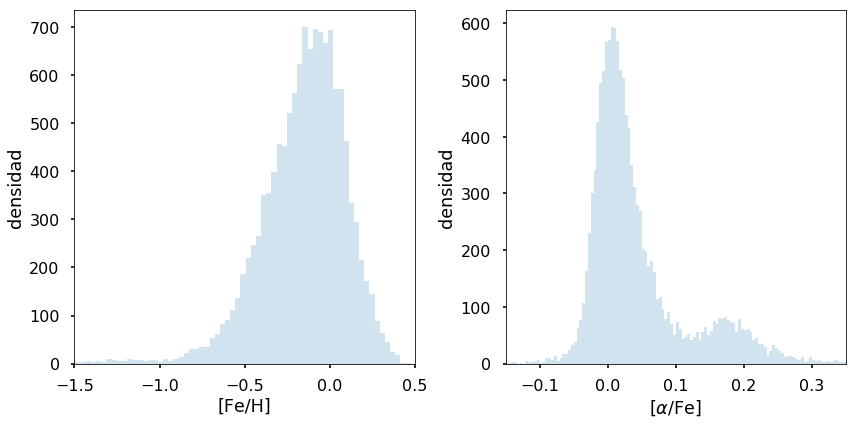

In [53]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(fe_h, bins=100, density=False, alpha=0.2)
plt.xlim(-1.5,0.5)
plt.xlabel('[Fe/H]')
plt.ylabel('densidad')

plt.subplot(1,2,2)
bins = np.linspace(-0.15,0.35,121)
n,bins,patches = plt.hist(alpha, bins, density=False, alpha=0.2)
plt.xlim(-0.15,0.35)
plt.ylabel('densidad')
plt.xlabel(r'[$\alpha$/Fe]')

plt.tight_layout()

In [54]:
from lmfit import Model
from numpy import sqrt, pi, exp

def gaussian(x,amp1,amp2,cen1,cen2,sig1,sig2):
    return ((amp1/(sqrt(2*pi)*sig1))*exp(-(x-cen1)**2/(2*sig1**2)) + 
            ((amp2/(sqrt(2*pi)*sig2))*exp(-(x-cen2)**2/2*sig2**2)))

gmod = Model(gaussian)
gmod.param_names

['amp1', 'amp2', 'cen1', 'cen2', 'sig1', 'sig2']

In [55]:
x = bins[:-1]
y = n
result = gmod.fit(y,x=x, amp1 =40, amp2 =10, cen1 = 0., cen2=0.2, sig1=0.1,sig2=0.05)
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 594
    # data points      = 120
    # variables        = 6
    chi-square         = 38769.556
    reduced chi-square = 340.084
    Akaike info crit   = 705.348
    Bayesian info crit = 722.073
[[Variables]]
    amp1:   36.4407242 +/- 1.230598 (3.38%) (init= 40)
    amp2:   2186.78769 +/- 257.9802 (11.80%) (init= 10)
    cen1:   0.00649956 +/- 0.000391 (6.01%) (init= 0)
    cen2:   0.11613002 +/- 0.010387 (8.95%) (init= 0.2)
    sig1:   0.02628522 +/- 0.000576 (2.19%) (init= 0.1)
    sig2:   11.5378141 +/- 1.109754 (9.62%) (init= 0.05)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp2, sig2)                =  0.896 
    C(amp1, cen2)                =  0.878 
    C(amp1, sig1)                =  0.845 
    C(amp1, sig2)                =  0.786 
    C(cen2, sig1)                =  0.721 
    C(cen2, sig2)                =  0.687 
    C(sig1, sig2)                =  0.613 
    C(amp1, amp2)          

In [56]:
print(result.best_values)

{'amp1': 36.44072422941206, 'amp2': 2186.7876954546127, 'cen1': 0.006499561319379683, 'cen2': 0.11613002943666585, 'sig1': 0.026285221168718138, 'sig2': 11.537814133929805}


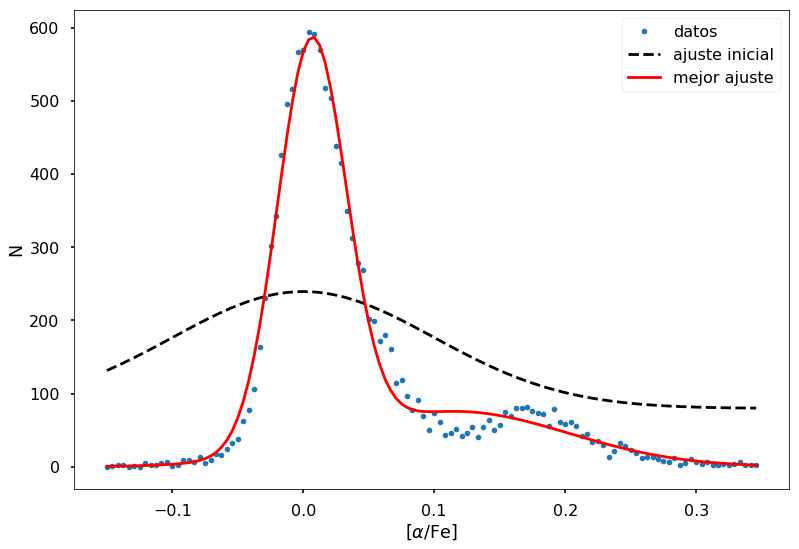

In [57]:
plt.plot(x, y ,'.',label='datos')
plt.plot(x, result.init_fit, 'k--', label='ajuste inicial')
plt.plot(x, result.best_fit, 'r-', label='mejor ajuste')
plt.xlabel(r'[$\alpha$/Fe]')
plt.ylabel('N')
plt.legend()

In [58]:
def lnlike(theta,x,y,yerr):
    amp1,amp2,cen1,cen2,sigma1,sigma2, lnf = theta
    model = ((amp1/(np.sqrt(2*np.pi)*sigma1))*np.exp(-(x-cen1)**2 /(2*(sigma1**2))) 
             + (amp2/(np.sqrt(2*np.pi)*sigma2))*np.exp(-(x-cen2)**2 /(2*(sigma2**2))))
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def lnprior(theta):
    amp1,amp2,cen1,cen2,sigma1,sigma2, lnf = theta
    if amp1 > 0 and amp2 > 0 and -0.1 < cen1 < 0.3 and -0.1 < cen2 < 0.3 and sigma1 > 0 and sigma2 > 0:
        return 0.0
    return -np.inf

def lnprob(theta,x,y,yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta,x,y,yerr)

In [59]:
amp1t  = result.best_values['amp1']
amp2t   = result.best_values['amp2']
cen1t   = result.best_values['cen1']
cen2t   = result.best_values['cen2']
sigma1t = result.best_values['sig1']
sigma2t = result.best_values['sig2']
f = 0.01
yerr = 0.01

In [60]:
import scipy.optimize as op
import emcee
import corner

nll = lambda *args: -lnlike(*args)

result = op.minimize(nll,[amp1t,amp2t,cen1t,cen2t,sigma1t,sigma2t,np.log(f)],args=(x,y,yerr))
amp1_ml,amp2_ml,cen1_ml,cen2_ml,sigma1_ml,sigma2_ml,lnf_ml = result["x"]
result["x"]

array([ 3.29440327e+01,  1.64552774e+01,  1.03507824e-02,  1.07112191e-01,
        2.49446730e-02,  8.92764998e-02, -1.03418552e+00])

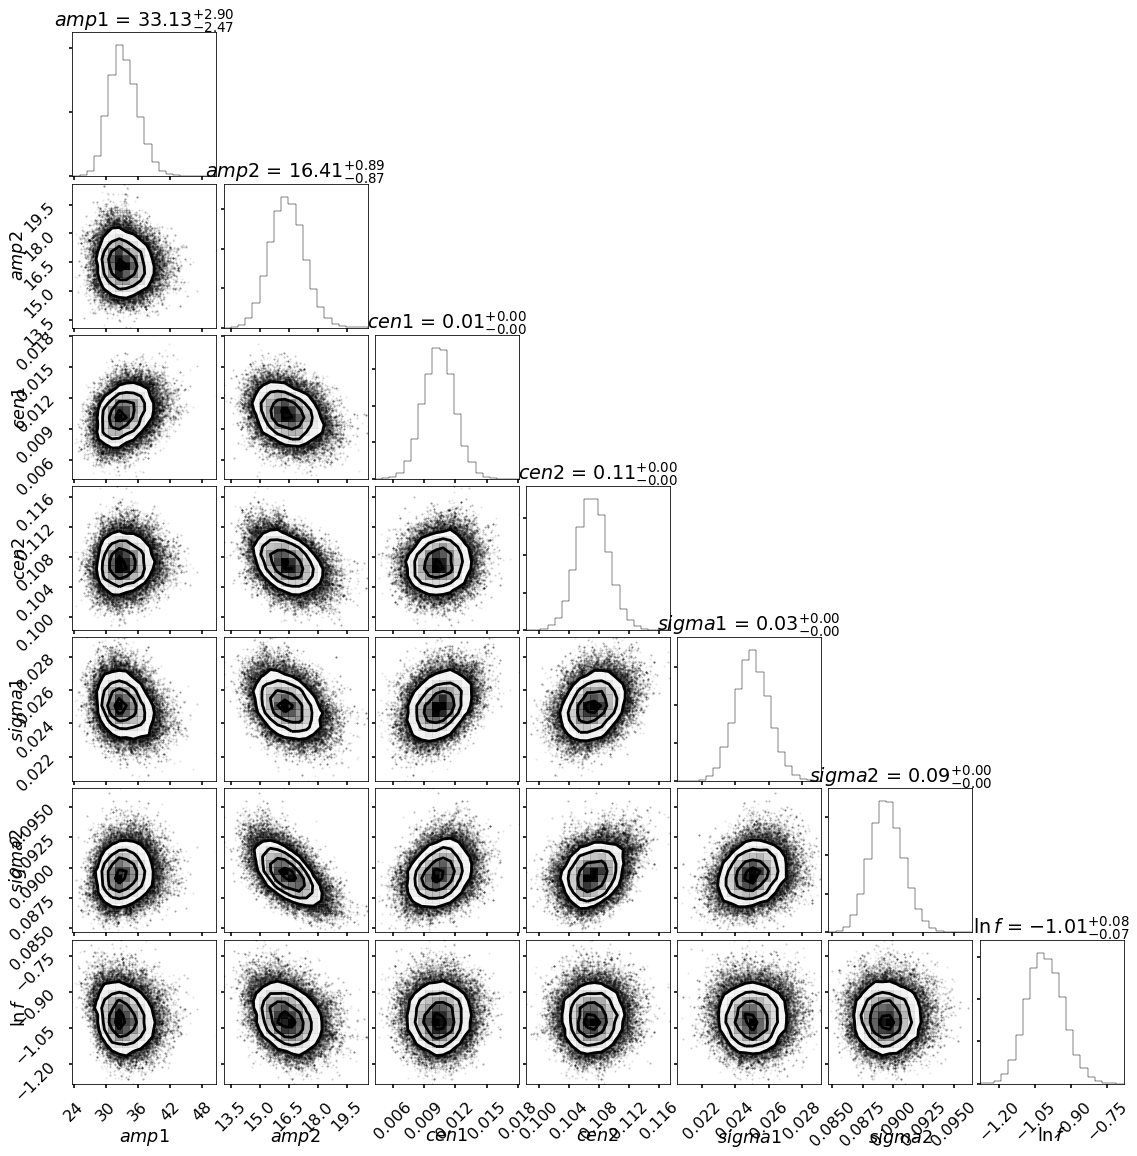

In [61]:
ndim,nwalkers = 7,1000

pos = [result['x'] + 1e-4*np.random.rand(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob,args=(x,y,yerr))
sampler.run_mcmc(pos,500)
samples = sampler.chain[:,400:,:].reshape((-1,ndim))

fig = corner.corner(samples,labels=["$amp1$","$amp2$","$cen1$","$cen2$","$sigma1$","$sigma2$","$\ln\, f$"],\
                    #quantiles=[0.16, 0.5, 0.84],\
                    show_titles=True)

plt.show()